In [178]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import seaborn as sns

In [179]:
df = pd.read_csv('ocs_cleaned.csv')

#### Overview

In [180]:
df.describe()

,potency,thc_min,thc_max,cbd_min,cbd_max,price,price_per_gram,grams
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,4.780702,17.248684,22.978289,0.327873,1.776294,51.197105,7.771053,7.958333
std,0.689115,3.654808,4.116879,1.674456,2.878679,40.120408,2.225878,7.999342
min,1.000000,0.000000,1.000000,0.000000,0.000000,7.200000,3.570000,1.000000
25%,5.000000,16.000000,22.000000,0.000000,1.000000,26.950000,6.100000,3.500000
50%,5.000000,18.000000,24.000000,0.000000,1.000000,36.450000,7.700000,3.500000
75%,5.000000,20.000000,25.000000,0.000000,1.200000,65.450000,9.700000,7.000000
max,5.000000,23.000000,29.700000,14.000000,20.000000,249.950000,13.710000,30.000000


In [181]:
df.dtypes

name               object
type               object
producer           object
brand              object
potency             int64
thc_min           float64
thc_max           float64
cbd_min           float64
cbd_max           float64
price             float64
price_per_gram    float64
grams             float64
dtype: object

#### Histograms

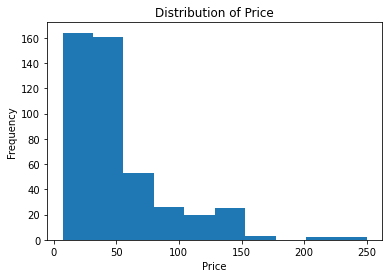

In [182]:
plt.hist(df['price'])
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

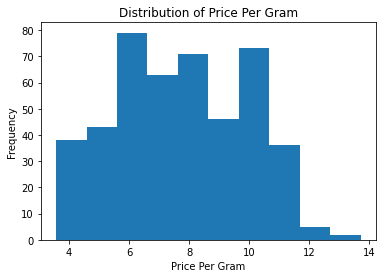

In [183]:
plt.hist(df['price_per_gram'])
plt.title('Distribution of Price Per Gram')
plt.xlabel('Price Per Gram')
plt.ylabel('Frequency')
plt.show()

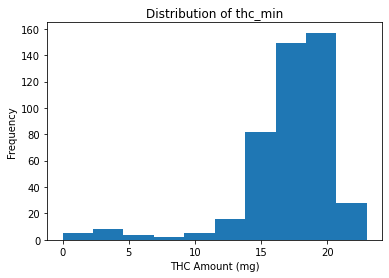

In [184]:
plt.hist(df['thc_min'])
plt.title('Distribution of thc_min')
plt.xlabel('THC Amount (mg)')
plt.ylabel('Frequency')
plt.show()

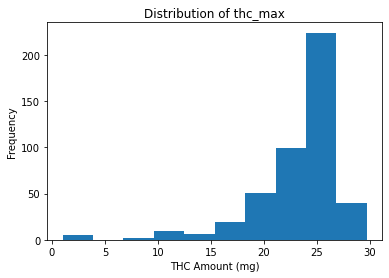

In [185]:
plt.hist(df['thc_max'])
plt.title('Distribution of thc_max')
plt.xlabel('THC Amount (mg)')
plt.ylabel('Frequency')
plt.show()

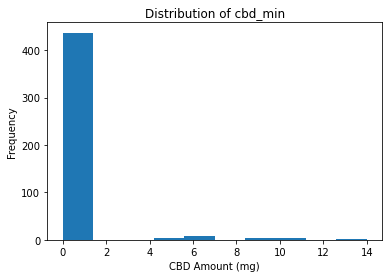

In [186]:
plt.hist(df['cbd_min'])
plt.title('Distribution of cbd_min')
plt.xlabel('CBD Amount (mg)')
plt.ylabel('Frequency')
plt.show()

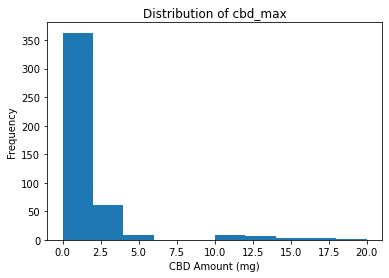

In [187]:
plt.hist(df['cbd_max'])
plt.title('Distribution of cbd_max')
plt.xlabel('CBD Amount (mg)')
plt.ylabel('Frequency')
plt.show()

#### Bar Charts

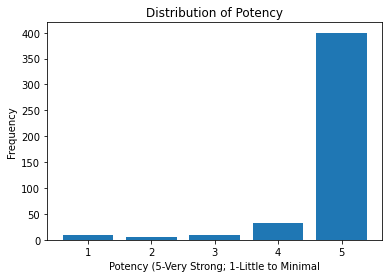

In [188]:
plt.bar(x = df['potency'].unique(), height = df['potency'].value_counts())
plt.title('Distribution of Potency')
plt.xlabel('Potency (5-Very Strong; 1-Little to Minimal')
plt.ylabel('Frequency')
plt.show()

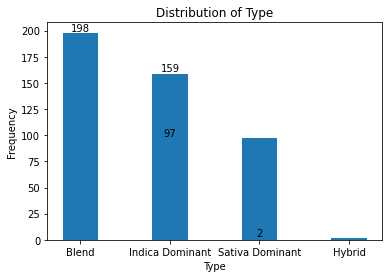

In [189]:
plt.bar(x = df['type'].unique(), height = df['type'].value_counts(), width = 0.4)
plt.title('Distribution of Type')
plt.xlabel('Type')
plt.ylabel('Frequency')
for i in range(len(df['type'].value_counts())):
    plt.annotate(str(df['type'].value_counts()[i]), xy=(df['type'][i],df.type.value_counts()[i]), ha='center', va='bottom')
plt.show()

In [190]:
d = pd.pivot_table(df, index = ['name'], values = ['price_per_gram']).sort_values('price_per_gram')[:10]

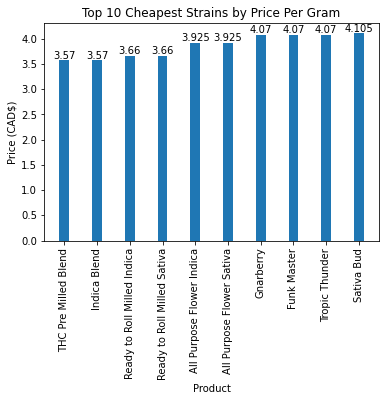

In [191]:
plt.bar(x = d.index, height = d.price_per_gram, width = 0.3)
plt.xticks(rotation=90)
plt.title('Top 10 Cheapest Strains by Price Per Gram')
plt.xlabel('Product')
plt.ylabel('Price (CAD$)')
for i in range(len(d.price_per_gram)):
    plt.annotate(str(d.price_per_gram[i]), xy=(d.index[i],d.price_per_gram[i]), ha='center', va='bottom')
plt.show()

#### Scatterplots

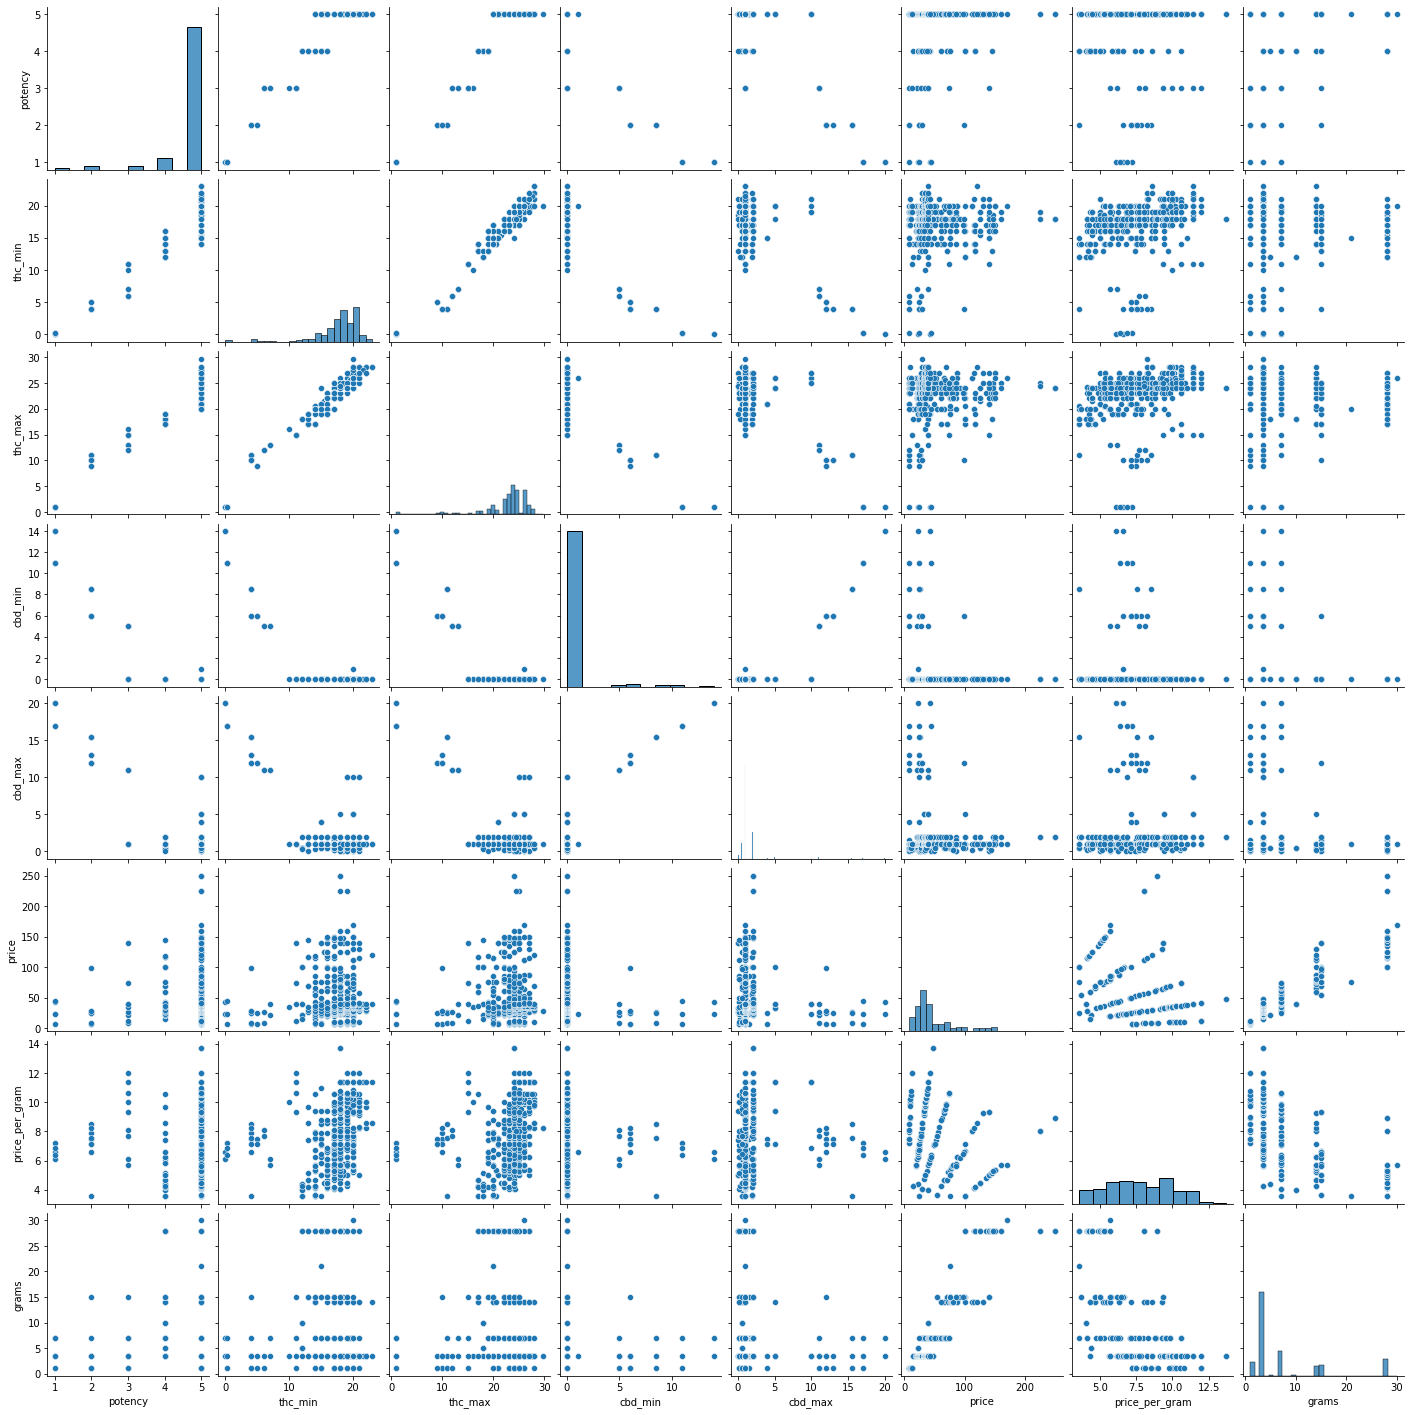

In [220]:
# Correlogram
sns.pairplot(df)
plt.show()

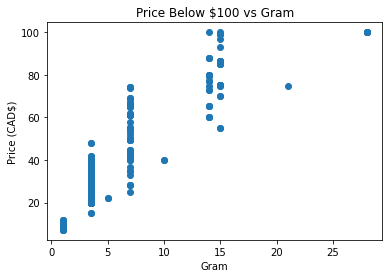

In [193]:
plt.scatter(x = df['grams'][df['price'] < 100], y = df['price'][df['price'] < 100])
plt.title('Price Below $100 vs Gram')
plt.xlabel('Gram')
plt.ylabel('Price (CAD$)')
plt.show()

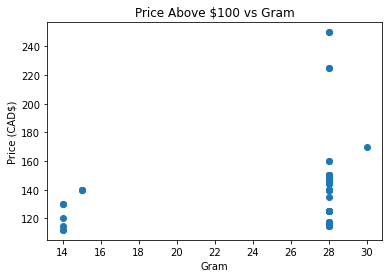

In [194]:
plt.scatter(x = df['grams'][df['price'] >= 100], y = df['price'][df['price'] >= 100])
plt.title('Price Above $100 vs Gram')
plt.xlabel('Gram')
plt.ylabel('Price (CAD$)')
plt.show()

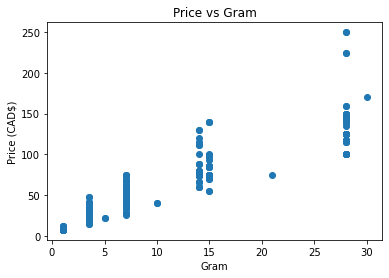

In [195]:
plt.scatter(x = df['grams'], y = df['price'])
plt.title('Price vs Gram')
plt.xlabel('Gram')
plt.ylabel('Price (CAD$)')
plt.show()

#### Boxplots

<AxesSubplot:>

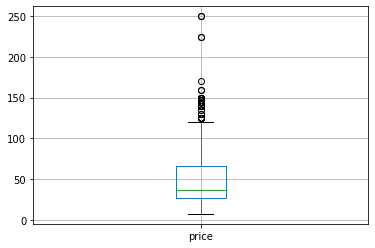

In [196]:
df.boxplot(column = 'price')

<AxesSubplot:>

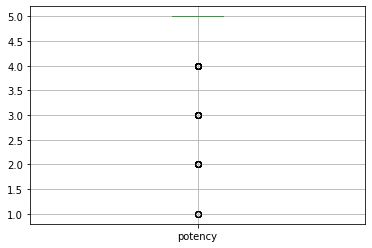

In [197]:
df.boxplot(column = 'potency')

<AxesSubplot:>

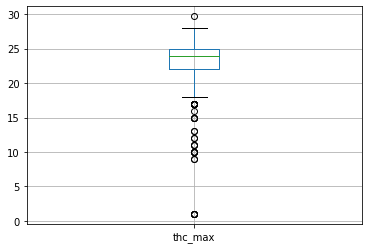

In [198]:
df.boxplot(column = 'thc_max')

<AxesSubplot:>

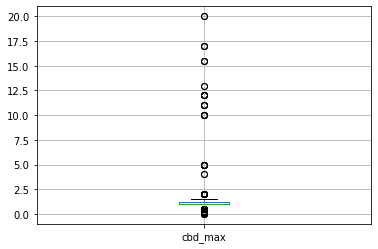

In [199]:
df.boxplot(column = 'cbd_max')

<AxesSubplot:>

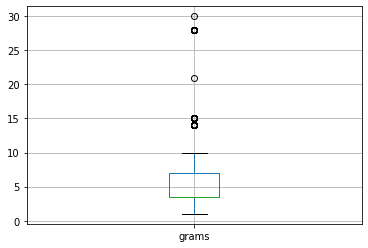

In [200]:
df.boxplot(column = 'grams')

#### Statistics

In [201]:
df.groupby(['type']).mean()

,potency,thc_min,thc_max,cbd_min,cbd_max,price,price_per_gram,grams
type,,,,,,,,
Blend,5.000000,16.500000,22.000000,0.000000,1.500000,53.950000,4.140000,14.000000
Hybrid,4.649485,16.391753,22.267010,0.881443,2.977835,44.160103,8.189072,6.185567
Indica Dominant,4.934343,18.214646,23.978283,0.000000,1.209545,54.579545,7.806919,8.507576
Sativa Dominant,4.666667,16.577987,22.179245,0.402579,1.752516,51.243396,7.517044,8.279874


In [202]:
# Brands sorted by average price
df.groupby(['brand'])['price'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
Bonify,2.0,14.950,0.000000,14.95,14.9500,14.950,14.9500,14.95
Northern Harvest,2.0,16.200,12.303658,7.50,11.8500,16.200,20.5500,24.90
Kiwi Cannabis,4.0,16.200,10.045895,7.50,7.5000,16.200,24.9000,24.90
Aurora,2.0,18.975,14.106780,9.00,13.9875,18.975,23.9625,28.95
Northern Green Canada,1.0,19.750,NaN,19.75,19.7500,19.750,19.7500,19.75
...,...,...,...,...,...,...,...,...
Legend,1.0,124.950,NaN,124.95,124.9500,124.950,124.9500,124.95
Twd.28,4.0,132.475,8.631387,125.00,125.0000,132.475,139.9500,139.95
Homestead,1.0,134.950,NaN,134.95,134.9500,134.950,134.9500,134.95


In [203]:
# Brands sorted by average price per gram
df.groupby(['brand'])['price_per_gram'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
Five Founders,1.0,3.570000,NaN,3.57,3.5700,3.570,3.5700,3.57
Bake Sale,4.0,3.925000,4.099187e-01,3.57,3.5700,3.925,4.2800,4.28
Simple Stash,6.0,3.986667,3.668606e-01,3.57,3.6775,4.000,4.2925,4.39
SHRED,3.0,4.070000,0.000000e+00,4.07,4.0700,4.070,4.0700,4.07
BINGO,6.0,4.166667,4.473328e-01,3.66,3.7900,4.180,4.5400,4.66
...,...,...,...,...,...,...,...,...
BOAZ,1.0,11.410000,NaN,11.41,11.4100,11.410,11.4100,11.41
Sugarbud,3.0,11.410000,2.175584e-15,11.41,11.4100,11.410,11.4100,11.41
Weed Me,3.0,11.410000,2.175584e-15,11.41,11.4100,11.410,11.4100,11.41


In [204]:
df.groupby(['brand'])['thc_max'].describe().sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
GreenSeal,1.0,28.0,NaN,28.0,28.0,28.0,28.00,28.0
The Loud Plug,1.0,28.0,NaN,28.0,28.0,28.0,28.00,28.0
SuperFlower,1.0,28.0,NaN,28.0,28.0,28.0,28.00,28.0
Flint & Embers,1.0,28.0,NaN,28.0,28.0,28.0,28.00,28.0
Kolab Project,2.0,28.0,0.000000,28.0,28.0,28.0,28.00,28.0
...,...,...,...,...,...,...,...,...
BINGO,6.0,18.0,1.549193,17.0,17.0,17.0,19.25,20.0
ELIOS RESERVE,1.0,17.0,NaN,17.0,17.0,17.0,17.00,17.0
Bake Sale,4.0,17.0,0.000000,17.0,17.0,17.0,17.00,17.0


In [205]:
df.groupby(['brand'])['cbd_max'].describe().sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
Kiwi Cannabis,4.0,12.500000,0.577350,12.00,12.00,12.50,13.00,13.00
Liiv,1.0,10.000000,NaN,10.00,10.00,10.00,10.00,10.00
Solei,14.0,7.678571,7.727591,1.00,1.00,2.00,15.50,17.00
Sugarbud,3.0,5.000000,0.000000,5.00,5.00,5.00,5.00,5.00
Northern Harvest,2.0,4.000000,0.000000,4.00,4.00,4.00,4.00,4.00
...,...,...,...,...,...,...,...,...
Canaca,3.0,0.400000,0.519615,0.10,0.10,0.10,0.55,1.00
Bonify,2.0,0.300000,0.000000,0.30,0.30,0.30,0.30,0.30
Station House,3.0,0.300000,0.173205,0.20,0.20,0.20,0.35,0.50


In [206]:
df.groupby(['brand'])['potency'].describe().sort_values('mean', ascending = False)[:10]

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
18twelve,2.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
Northern Green Canada,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0
Royal City Cannabis Co.,2.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
Ritual Green,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0
Reef Organic,2.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
RIFF,16.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
Papa's Herb,2.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
Palmetto,3.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
Original Stash,18.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0


In [207]:
df.groupby(['brand'])['potency'].describe().sort_values('mean', ascending = True)[:10]

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
Kiwi Cannabis,4.0,2.000000,0.000000,2.0,2.00,2.0,2.00,2.0
Solei,14.0,3.500000,1.829250,1.0,2.00,5.0,5.00,5.0
Canna Farms,2.0,4.000000,1.414214,3.0,3.50,4.0,4.50,5.0
ELIOS RESERVE,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0
Strain Rec,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0
Bake Sale,4.0,4.000000,0.000000,4.0,4.00,4.0,4.00,4.0
Trailblazer,6.0,4.000000,0.000000,4.0,4.00,4.0,4.00,4.0
Simple Stash,6.0,4.000000,0.000000,4.0,4.00,4.0,4.00,4.0
BINGO,6.0,4.333333,0.516398,4.0,4.00,4.0,4.75,5.0


In [208]:
corr = df[['price', 'price_per_gram', 'potency', 'grams', 'thc_max', 'cbd_max', 'thc_min', 'cbd_min']].corr()
corr

,price,price_per_gram,potency,grams,thc_max,cbd_max,thc_min,cbd_min
price,1.000000,-0.354477,0.079908,0.920246,0.035146,-0.113655,0.043035,-0.116635
price_per_gram,-0.354477,1.000000,0.137674,-0.599258,0.356207,0.005602,0.355723,-0.080610
potency,0.079908,0.137674,1.000000,0.025649,0.884565,-0.794482,0.871123,-0.864180
grams,0.920246,-0.599258,0.025649,1.000000,-0.083415,-0.109040,-0.075815,-0.090895
thc_max,0.035146,0.356207,0.884565,-0.083415,1.000000,-0.687132,0.970509,-0.768283
cbd_max,-0.113655,0.005602,-0.794482,-0.109040,-0.687132,1.000000,-0.693330,0.906291
thc_min,0.043035,0.355723,0.871123,-0.075815,0.970509,-0.693330,1.000000,-0.767376
cbd_min,-0.116635,-0.080610,-0.864180,-0.090895,-0.768283,0.906291,-0.767376,1.000000


<AxesSubplot:>

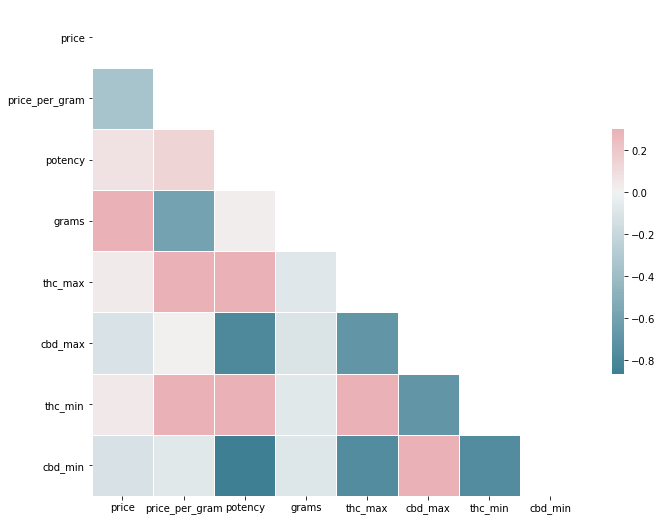

In [209]:
# Heatmap showing correlations among numerical columns
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [210]:
df.iloc[:,4:].corr()

,potency,thc_min,thc_max,cbd_min,cbd_max,price,price_per_gram,grams
potency,1.000000,0.871123,0.884565,-0.864180,-0.794482,0.079908,0.137674,0.025649
thc_min,0.871123,1.000000,0.970509,-0.767376,-0.693330,0.043035,0.355723,-0.075815
thc_max,0.884565,0.970509,1.000000,-0.768283,-0.687132,0.035146,0.356207,-0.083415
cbd_min,-0.864180,-0.767376,-0.768283,1.000000,0.906291,-0.116635,-0.080610,-0.090895
cbd_max,-0.794482,-0.693330,-0.687132,0.906291,1.000000,-0.113655,0.005602,-0.109040
price,0.079908,0.043035,0.035146,-0.116635,-0.113655,1.000000,-0.354477,0.920246
price_per_gram,0.137674,0.355723,0.356207,-0.080610,0.005602,-0.354477,1.000000,-0.599258
grams,0.025649,-0.075815,-0.083415,-0.090895,-0.109040,0.920246,-0.599258,1.000000


#### Scatterplots using Seaborn

<AxesSubplot:xlabel='price_per_gram', ylabel='thc_max'>

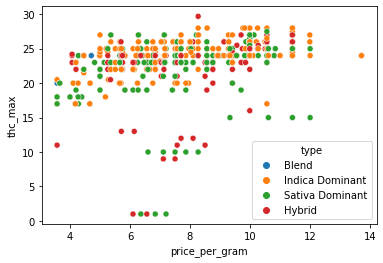

In [237]:
sns.scatterplot(data=df, x="price_per_gram", y="thc_max", hue="type", legend="full")

<AxesSubplot:xlabel='price_per_gram', ylabel='cbd_max'>

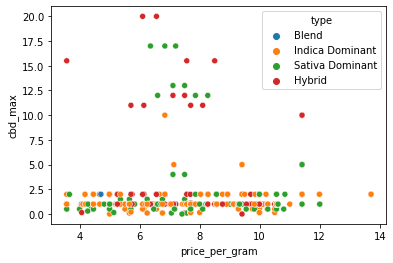

In [238]:
sns.scatterplot(data=df, x="price_per_gram", y="cbd_max", hue="type", legend="full")

<AxesSubplot:xlabel='thc_min', ylabel='thc_max'>

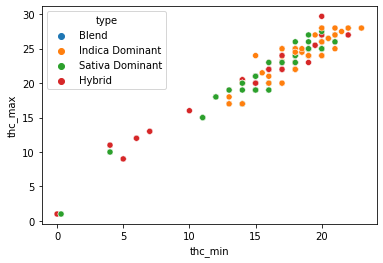

In [239]:
sns.scatterplot(data=df, x="thc_min", y="thc_max", hue="type", legend="full")

<AxesSubplot:xlabel='cbd_min', ylabel='cbd_max'>

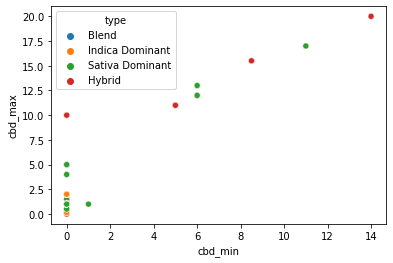

In [240]:
sns.scatterplot(data=df, x="cbd_min", y="cbd_max", hue="type", legend="full")

<AxesSubplot:xlabel='thc_max', ylabel='potency'>

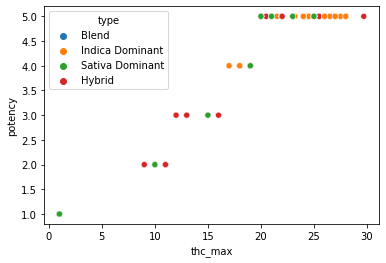

In [247]:
sns.scatterplot(data=df, x="thc_max", y="potency", hue="type", legend="full")

<AxesSubplot:xlabel='cbd_max', ylabel='potency'>

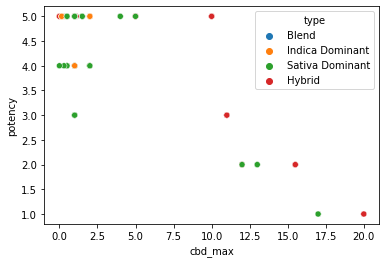

In [258]:
sns.scatterplot(data=df, x="cbd_max", y="potency", hue="type", legend="full")